Give the path to directory:  /home/przemek/programs/xrd_2d_mpi_gfortran/done/
How many header lines you want to set?  2
Which column is x? (counting from 1)  1
Which column is y? (counting from 1) )  2


Error: wrong data in line:                                                                                                                                                                                                                                                                                                                                                                                                              2.6GPa.dat                                                                                          0000664 0001750 0001750 00000022163 14761100604 012366  0                                                                                                    ustar   przemek                         przemek                                                                                                                                                                                                                  0.0711510488  0.52210216E+00
Error: wrong data in line:       

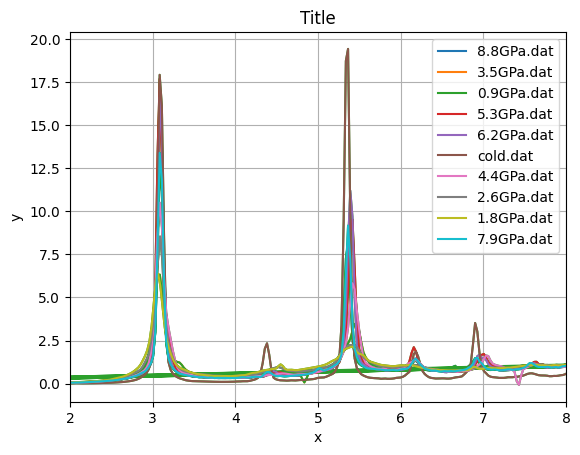

In [1]:
import os
import matplotlib.pyplot as plt

def wczytaj_dane(sciezka_do_pliku, pominiete_wiersze, kolumna_x, kolumna_y):
    """
    Wczytuje dane z pliku tekstowego, pomijając określone wiersze i wybierając kolumny x i y.
    Load data from all files in directory. You can choose number of header lines and x and y columns.
    Args:
        sciezka_do_pliku (str): Ścieżka do katalogu do wczytania./Path to directory
        pominiete_wiersze (int): Liczba wierszy do pominięcia na początku pliku./Number of header lines
        kolumna_x (int): Indeks kolumny x (liczone od 1). /column x counting from 1
        kolumna_y (int): Indeks kolumny y (liczone od 1). /column y

    Returns:
        tuple: Krotka zawierająca listy x i y.
    """

    if not os.path.exists(sciezka_do_pliku):
        print(f"Error: path '{sciezka_do_pliku}' was not found.")
        return [], []

    try:
        with open(sciezka_do_pliku, 'r') as plik:
            linie = plik.readlines()
    except Exception as e:
        print(f"Error during read file: {e}")
        return [], []

    x_values = []
    y_values = []

    for linia in linie[pominiete_wiersze:]:
        wartosci = linia.strip().split()
        try:
            x_values.append(float(wartosci[kolumna_x]))
            y_values.append(float(wartosci[kolumna_y]))
        except (ValueError, IndexError):
            print(f"Error: wrong data in line: {linia.strip()}")

    return x_values, y_values

def przetwarzaj_katalog(sciezka_do_katalogu):
    """
    Przetwarza wszystkie pliki w danym katalogu i wyświetla je na jednym wykresie.

    Args:
        sciezka_do_katalogu (str): Ścieżka do katalogu zawierającego pliki.
    """

    if not os.path.isdir(sciezka_do_katalogu):
        print(f"Błąd: Ścieżka '{sciezka_do_katalogu}' nie jest katalogiem.")
        return

    try:
        pominiete_wiersze = int(input("How many header lines you want to set? "))
        kolumna_x = int(input("Which column is x? (counting from 1) ")) - 1
        kolumna_y = int(input("Which column is y? (counting from 1) ) ")) - 1
    except ValueError:
        print("Error: you set incorrect data.")
        return

    plt.figure()  # Utwórz jeden wykres dla wszystkich danych
    pliki = os.listdir(sciezka_do_katalogu)
    for plik in pliki:
        if plik.endswith(".dat"):
            sciezka_do_pliku = os.path.join(sciezka_do_katalogu, plik)
            x, y = wczytaj_dane(sciezka_do_pliku, pominiete_wiersze, kolumna_x, kolumna_y)

            if x and y:
                plt.plot(x, y, label=plik)  # Dodaj dane do wykresu z etykietą pliku

    plt.title('Title')
    plt.xlabel('x')
    plt.ylabel('y')
    x_min=2
    x_max=8
    if x_min is not None and x_max is not None:
        plt.xlim(x_min, x_max)  # you can set x min and x max
    plt.grid(True)
    plt.legend()  # legend
    plt.show()

# Przykład użycia
sciezka_do_katalogu = input("Give the path to directory: ")
przetwarzaj_katalog(sciezka_do_katalogu)